# Quantum Circuit Builder v1

In this notebook we rely on IBM *qiskit* [1], OpenAI *gym* [2] and the library *stable-baselines* [3] to setup a quantum game and have some artificial reinforcement learning agent play and learn them.

In a previous notebook we run a very simple game, *qcircuit-v0*. We now try out a more challenging version, *qcircuit-v0*, and we compare the performances of different agents playing it.

## Setup

As before, it is necessary to setup the packages required for this simulation as explained in [Setup.ipynb](Setup.ipynb).

Next, we import some basic libraries.

In [1]:
import numpy as np
import gym

from IPython.display import display

## Importing the game

The game we will run is provided in **gym-qcircuit** [4], and it is implemented complying with the standard OpenAI gym interface. 

The game is a simple *quantum circuit building* game: given a fixed number of qubits and a desired final state for these qubits, the objective is to design a quantum circuit that takes the given qubits to the desired final state. 

In [2]:
import qcircuit

The module **qcircuit** offers two versions of the game:
- *qcircuit-v0*: it presents the player with a single qubit, and it requires to design a simple circuit setting this qubit in a perfect superposition.
- *qcircuit-v1*: a slightly more challenging scenario where the player is presented with two qubits and he/she is requested to design a circuit setting the qubits in the state $\frac{1}{\sqrt{2}}\left|00\right\rangle +\frac{1}{\sqrt{2}}\left|11\right\rangle $.

Details on the implementation of these games are available at https://github.com/FMZennaro/gym-qcircuit/blob/master/qcircuit/envs/qcircuit_env.py.

## qcircuit-v1
We start loading the first scenario and run agents on it.

In [3]:
env = gym.make('qcircuit-v1')

The game *qcircuit-v1* is *completely observed*, and both its *state space* and *action space* are described below.

Remember that two qubits are described by $\alpha\left|00\right\rangle +\beta\left|01\right\rangle +\gamma\left|10\right\rangle +\delta\left|11\right\rangle$, where $\alpha, \beta, \gamma, \delta$ are complex numbers and $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$ are the measurement axes. The state space is then described by eight real numbers between -1 and 1 representing the real and complex part of $\alpha, \beta, \gamma, \delta$.

An agent plays the game interacting with a quantum circuit, adding and removing standard gates. In this version of the game there are seven actions available: add an *X gate* on the first or on the second qubit, add a *Hadamard gate* on the first or on the second qubit, add a *CNOT gate* on the first or on the second qubit, or remove the last inserted gate.

Again, details on the implementation of the state space and the action space are available at https://github.com/FMZennaro/gym-qcircuit/blob/master/qcircuit/envs/qcircuit_env.py.

### Random agent
First, we simply run a random agent. This allows us to test out the game and see its evolution.

A random agent selects a possible action from the action space at random and executes it. Given the number of actions, and the relative low probability of removing a gate ($\frac{1}{7}$) over adding a new gate ($\frac{1}{7}$), it is likely that the random agent will run for a very long time developing a long and complex circuit before stumbling in the correct solution.

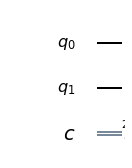

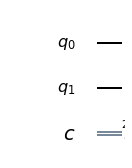

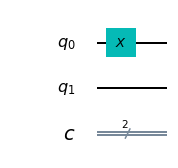

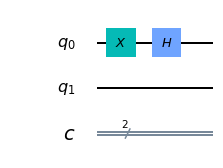

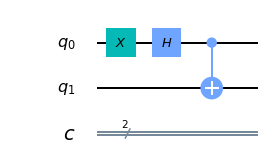

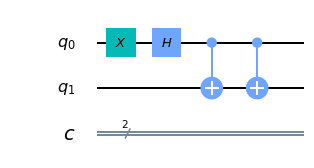

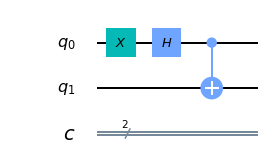

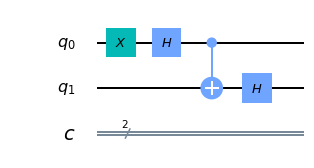

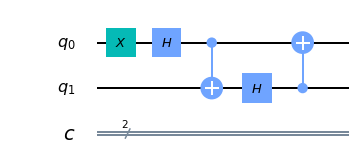

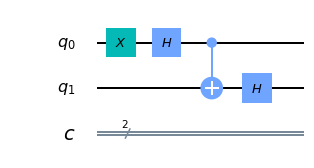

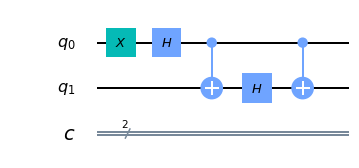

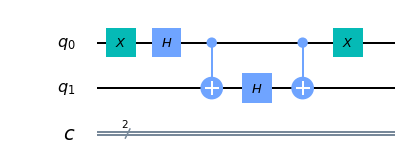

In [4]:
env.reset()
display(env.render())

done = False
while(not done):
    obs, _, done, info = env.step(env.action_space.sample())
    display(info['circuit_img'])
       
env.close()

### PPO2 Agent

We now run a *PPO2* agent, a more sophisticated agent picked from the library of *stable_baselines*.

First we import the agent.

In [5]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Then we train it.

In [6]:
env = DummyVecEnv([lambda: env])
modelPPO2 = PPO2(MlpPolicy, env, verbose=1)
modelPPO2.learn(total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



--------------------------------------
| approxkl           | 1.5884034e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00191       |
| fps                | 24            |
| n_updates          | 1             |
| policy_entropy     | 1.945895      |
| policy_loss        | -0.0007621155 |
| serial_timesteps   | 128           |
| time_elapsed       | 3.58e-06      |
| total_timesteps    | 128           |
| value_loss         | 304.28973     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2909548e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00177       |
| fps                | 32            |
| n_updates          | 2             |
| policy_entropy     

---------------------------------------
| approxkl           | 1.0285833e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00987        |
| fps                | 22             |
| n_updates          | 10             |
| policy_entropy     | 1.9424908      |
| policy_loss        | -0.00080490555 |
| serial_timesteps   | 1280           |
| time_elapsed       | 41.5           |
| total_timesteps    | 1280           |
| value_loss         | 717.072        |
---------------------------------------
--------------------------------------
| approxkl           | 4.757797e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.006         |
| fps                | 32            |
| n_updates          | 11            |
| policy_entropy     | 1.9414101     |
| policy_loss        | -0.0017191665 |
| serial_timesteps   | 1408          |
| time_elapsed       | 47.3          |
| total_timesteps    | 1408          |
| value_loss         | 261.5157      |
------------

--------------------------------------
| approxkl           | 8.295983e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0169        |
| fps                | 31            |
| n_updates          | 27            |
| policy_entropy     | 1.8943397     |
| policy_loss        | -0.0020506172 |
| serial_timesteps   | 3456          |
| time_elapsed       | 126           |
| total_timesteps    | 3456          |
| value_loss         | 274.5761      |
--------------------------------------
--------------------------------------
| approxkl           | 7.5044154e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0296        |
| fps                | 30            |
| n_updates          | 28            |
| policy_entropy     | 1.895614      |
| policy_loss        | -0.0002788771 |
| serial_timesteps   | 3584          |
| time_elapsed       | 130           |
| total_timesteps    | 3584          |
| value_loss         | 712.16614     |
-------------------------

---------------------------------------
| approxkl           | 7.898419e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.0361         |
| fps                | 32             |
| n_updates          | 44             |
| policy_entropy     | 1.8026001      |
| policy_loss        | -0.00043669326 |
| serial_timesteps   | 5632           |
| time_elapsed       | 207            |
| total_timesteps    | 5632           |
| value_loss         | 729.86597      |
---------------------------------------
--------------------------------------
| approxkl           | 2.6466723e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0224        |
| fps                | 31            |
| n_updates          | 45            |
| policy_entropy     | 1.7909173     |
| policy_loss        | -0.001732644  |
| serial_timesteps   | 5760          |
| time_elapsed       | 211           |
| total_timesteps    | 5760          |
| value_loss         | 1133.4182     |
------------

--------------------------------------
| approxkl           | 9.941224e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00992       |
| fps                | 31            |
| n_updates          | 61            |
| policy_entropy     | 1.6221255     |
| policy_loss        | -0.0008568058 |
| serial_timesteps   | 7808          |
| time_elapsed       | 302           |
| total_timesteps    | 7808          |
| value_loss         | 1107.5613     |
--------------------------------------
--------------------------------------
| approxkl           | 4.4428856e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00487       |
| fps                | 29            |
| n_updates          | 62            |
| policy_entropy     | 1.5875471     |
| policy_loss        | 0.00012629665 |
| serial_timesteps   | 7936          |
| time_elapsed       | 306           |
| total_timesteps    | 7936          |
| value_loss         | 1427.987      |
-------------------------

--------------------------------------
| approxkl           | 0.00014238954 |
| clipfrac           | 0.0           |
| explained_variance | 0.00227       |
| fps                | 29            |
| n_updates          | 78            |
| policy_entropy     | 1.502316      |
| policy_loss        | -0.0016405442 |
| serial_timesteps   | 9984          |
| time_elapsed       | 390           |
| total_timesteps    | 9984          |
| value_loss         | 1184.733      |
--------------------------------------


Last, we test it by letting it play the game; we run ten steps of the game (notice, though, that the agent could reach the solution before the tenth step, which would cause the game to restart).

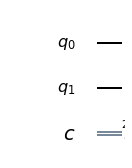

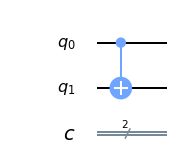

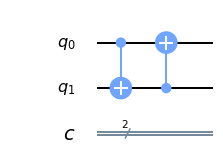

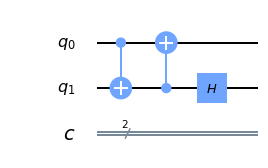

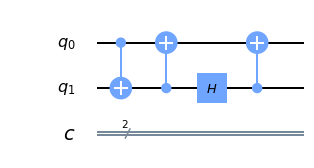

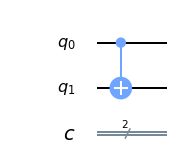

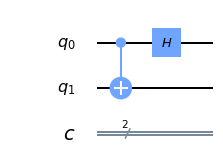

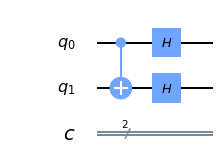

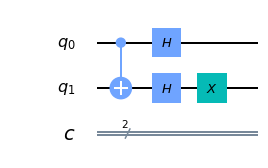

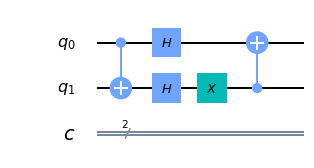

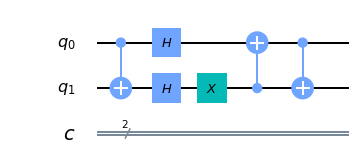

In [7]:
obs = env.reset()
display(env.render())

for _ in range(10):
    action, _states = modelPPO2.predict(obs)
    obs, _, done, info = env.step(action)
    display(info[0]['circuit_img'])
    
env.close()

As expected, the agent easily learned the optimal circuit. 

### A2C Agent

For comparison, we now run an *A2C* agent, another agent from the library of *stable_baselines*.

First we import the agent.

In [8]:
from stable_baselines import A2C

We train it.

In [9]:
modelA2C = A2C(MlpPolicy, env, verbose=1)
modelA2C.learn(total_timesteps=10000)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
---------------------------------
| explained_variance | -0.0111  |
| fps                | 11       |
| nupdates           | 1        |
| policy_entropy     | 1.95     |
| total_timesteps    | 5        |
| value_loss         | 12.5     |
---------------------------------
---------------------------------
| explained_variance | 0.0309   |
| fps                | 32       |
| nupdates           | 100      |
| policy_entropy     | 1.95     |
| total_timesteps    | 500      |
| value_loss         | 10.4     |
---------------------------------
---------------------------------
| explained_variance | -0.0657  |
| fps                | 33       |
| nupdates           | 200      |
| policy_entropy     | 1.95     |
| total_timesteps    | 1000     |
| value_loss         | 11.1     |
---------------------------------
---------------------------------
| explained_variance | 0.0445

And we test it by letting it play ten steps of the game (as before the agent may reach a solution before the tenth step).

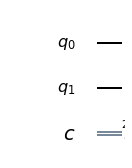

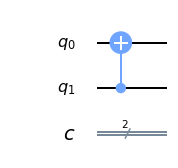

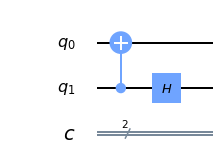

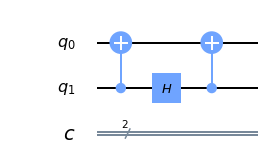

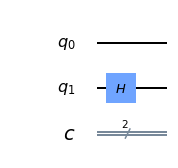

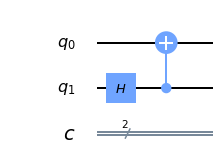

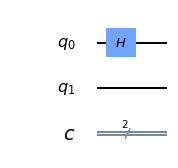

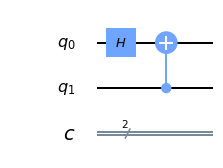

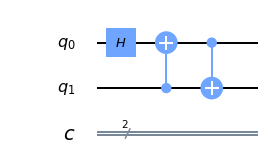

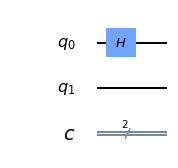

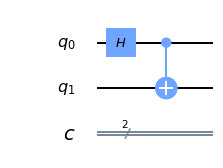

In [10]:
obs = env.reset()
display(env.render())

for _ in range(10):
    action, _states = modelA2C.predict(obs)
    obs, _, done, info = env.step(action)
    display(info[0]['circuit_img'])
    
env.close()

## Comparison of the agents

Finally, we compare the agents quantitavely by contrasting their average reward computed running 1000 episodes of the game. We rely on the *evaluation* module that provides simple and standard routines to evaluate the agents.

In [11]:
import evaluation
n_episodes = 1000

PPO2_perf, _ = evaluation.evaluate_model(modelPPO2, env, num_steps=n_episodes)
A2C_perf, _ = evaluation.evaluate_model(modelA2C, env, num_steps=n_episodes)

env = gym.make('qcircuit-v1')
rand_perf, _ = evaluation.evaluate_random(env, num_steps=n_episodes)

In [12]:
print('Mean performance of random agent (out of {0} episodes): {1}'.format(n_episodes,rand_perf))
print('Mean performance of PPO2 agent (out of {0} episodes): {1}'.format(n_episodes,PPO2_perf))
print('Mean performance of A2C agent (out of {0} episodes): {1}'.format(n_episodes,A2C_perf))

Mean performance of random agent (out of 1000 episodes): 19.333
Mean performance of PPO2 agent (out of 1000 episodes): 72.541
Mean performance of A2C agent (out of 1000 episodes): 90.753


The reinforcement learning agents (PPO2, A2C) learned to play the game to different degrees. On the opposite, the random agent performed very badly, showing that even with this limited state and action space a random policy rarely finds the right solution.

## References

[1] IBM qiskit, https://qiskit.org/

[2] OpenAI gym, http://gym.openai.com/docs/

[3] stable-baselines, https://github.com/hill-a/stable-baselines

[4] gym-qcircuit, https://github.com/FMZennaro/gym-qcircuit